# Desafio do Kaggle: Houses Prices - Advanced Regression Techniques


In [1]:
#importando o dataset
import pandas as pd

#dataset de treino
dbTreino = pd.read_csv('train.csv')


In [2]:
#visualizando database
dbTreino.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Shape da base
dbTreino.shape

(1460, 81)

In [4]:
#informações da base
dbTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Explorando o dataset

In [5]:
#Valores vazios em porcentagem
(dbTreino.isnull().sum()/dbTreino.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

In [6]:
# Podemos eliminar colunas com mais de 10% de valores vazios, para não dar problema no modelo final.
colunas_maior_10p = dbTreino.columns[(dbTreino.isnull().sum()/dbTreino.shape[0] < 10/100)]
dbTreino = dbTreino.filter(items = colunas_maior_10p)

#mostrar a coluna em forma de porcentagem
(dbTreino.isnull().sum()/dbTreino.shape[0]).sort_values(ascending=False).head(20)


GarageYrBlt     0.055479
GarageQual      0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
LandSlope       0.000000
LotConfig       0.000000
LotShape        0.000000
Street          0.000000
LotArea         0.000000
MSZoning        0.000000
MSSubClass      0.000000
Id              0.000000
dtype: float64

In [7]:
#filtragem das colunas numéricas para nova database
dbTreino2 =dbTreino.filter(dbTreino.columns[dbTreino.dtypes != 'object'])
dbTreino2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [8]:
# Esta base nova possui valores nulos?
dbTreino2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
LotArea         0
dtype: int64

In [9]:
#substituir dados nulos por -1
dbTreino2 = dbTreino2.fillna(-1)
dbTreino2.isnull().sum().sort_values(ascending=False).head(3)

Id            0
MSSubClass    0
LotArea       0
dtype: int64

## Criando o Modelo


In [42]:
#selecionando X e y
X = dbTreino2.drop('SalePrice', axis =1)
y = dbTreino2.SalePrice


In [11]:
#Import train_test_split
from sklearn.model_selection import train_test_split

In [12]:
#Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#REGRESSÃO LINEAR
#Importanto regressão linear
from sklearn.linear_model import LinearRegression


In [14]:
# Criando o Regressor e fazendo o fit dos dados dos treinos
reg_rl=LinearRegression().fit(X_train,y_train)

In [15]:
#Fazendo previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [16]:
#Importanto arvore de regressão
from sklearn import tree

In [17]:
#Criando regressor e fazendo fit dos dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [18]:
#fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [19]:
# Importanto KNN
from sklearn.neighbors import KNeighborsRegressor

In [20]:
#Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)

In [21]:
#Fazendo a previsão
y_knn = reg_knn.predict(X_test)

In [22]:
# Avaliando os erros:
#Erro médio absoluto
from sklearn.metrics import mean_absolute_error

#Erro quadrático médio
from sklearn.metrics import mean_squared_error

In [23]:
#Avaliando o erro da regressão.
#print do erro absoluto do meu y_test com relação ao y_rl (y da regressão linear)

print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error (y_test, y_rl))

23763.187393064778
1533982883.4448779


In [24]:
#Erro da arvore de desição
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error (y_test, y_ar))

27580.78838174274
2530245114.701245


In [25]:
#Erro do Knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error (y_test, y_knn))

33273.08298755187
2733937586.841286


- Note que a regrssão aoresentou o menor erro deste os três métodos.

Text(0.5, 1.0, 'y_knn X y_test')

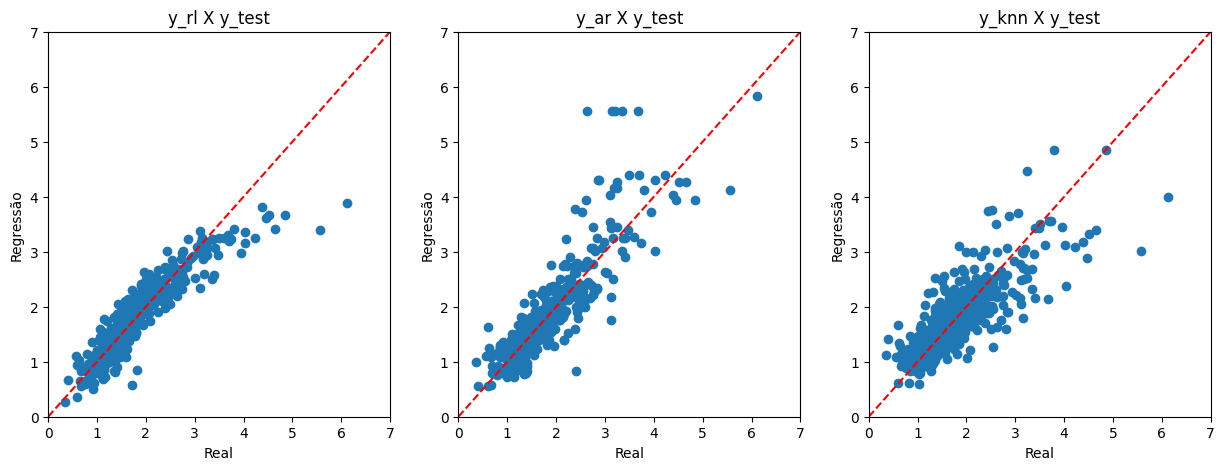

In [26]:
#Visualização dos erros 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 3, figsize = (15,5))

ax[0].scatter(y_test/100000, y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r') #linha pontilhada vermelha
ax[0].set(xlim = (0,7), ylim = (0,7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Regressão')
ax[0].set_title('y_rl X y_test')

ax[1].scatter(y_test/100000, y_ar/100000)
ax[1].plot([0,7], [0,7], '--r')
ax[1].set(xlim=(0,7), ylim=(0,7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Regressão')
ax[1].set_title('y_ar X y_test')

ax[2].scatter(y_test/100000, y_knn/100000)
ax[2].plot([0,7], [0,7], '--r')
ax[2].set(xlim=(0,7), ylim=(0,7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Regressão')
ax[2].set_title('y_knn X y_test')

# Avaliando agora com os dados de teste

In [27]:
#Importando database de teste
dbTeste = pd.read_csv('test.csv')

In [28]:
dbTeste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


- Todos os tratamentos que foram feitos na base de treino serão repetidos na base de teste.

In [29]:
# Podemos eliminar colunas com mais de 10% de valores vazios, para não dar problema no modelo final.
colunas_maior_10p = dbTeste.columns[(dbTeste.isnull().sum()/dbTeste.shape[0] < 10/100)]
dbTeste = dbTeste.filter(items = colunas_maior_10p)

#mostrar a coluna em forma de porcentagem
(dbTeste.isnull().sum()/dbTeste.shape[0]).sort_values(ascending=False).head(20)


GarageCond      0.053461
GarageFinish    0.053461
GarageYrBlt     0.053461
GarageQual      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType2    0.028787
BsmtFinType1    0.028787
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
BsmtFullBath    0.001371
Functional      0.001371
Utilities       0.001371
GarageArea      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
BsmtFinSF1      0.000685
dtype: float64

In [30]:
#Verificando colunas numéricas e filtrando
dbTeste2 = dbTeste.filter(dbTeste.columns[dbTeste.dtypes != 'object'])
dbTeste2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [31]:
#Visualizando quantidade de valores vazios nesta nova base

dbTeste2.isnull().sum().sort_values(ascending= False).head(13)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
GarageCars       1
GarageArea       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFinSF1       1
MSSubClass       0
Id               0
OverallQual      0
dtype: int64

In [32]:
#Substituindo os valores nulos por -1.

dbTeste2 = dbTeste2.fillna(-1)


In [33]:
dbTeste2.isnull().sum().sort_values(ascending= False).head(13)

Id              0
MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
dtype: int64

- Criação do modelo de regressão linear para o dataset de teste

In [34]:
# Utilizando regressão linear
y_pred = reg_rl.predict(dbTeste2) 

In [35]:
#Adicionar essa coluna de previsão na database, visto que não se tem os preços esperados.
dbTeste2['SalePrice'] = y_pred

In [36]:
dbTeste2

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,122234.995960
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,139178.263684
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,169872.054251
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,199138.801656
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,196257.109229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,59584.320646
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,54459.048029
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,175307.588032
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,106132.531424
